# Practice Project - 5
Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Features with NaN: 
1. Age - 177
2.Cabin - 687
3. Embarked - 2

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [8]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [11]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
(df.loc[0:]==" ").sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
(df.loc[0:]==0).sum()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

In [15]:
df["Fare"]=df["Fare"].replace(0,np.nan)   #Fare cannot be zero
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            15
Cabin          687
Embarked         2
dtype: int64

In [16]:
import statistics as stats
df["Age"]=df["Age"].fillna(stats.mode(df["Age"]))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare            15
Cabin          687
Embarked         2
dtype: int64

In [17]:
df["Embarked"]=df["Embarked"].fillna(stats.mode(df["Embarked"]))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare            15
Cabin          687
Embarked         0
dtype: int64

In [18]:
df["Fare"]=df["Fare"].fillna(np.mean(df["Fare"]))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

filled  age,fare and embarked features using mode

# EDA 

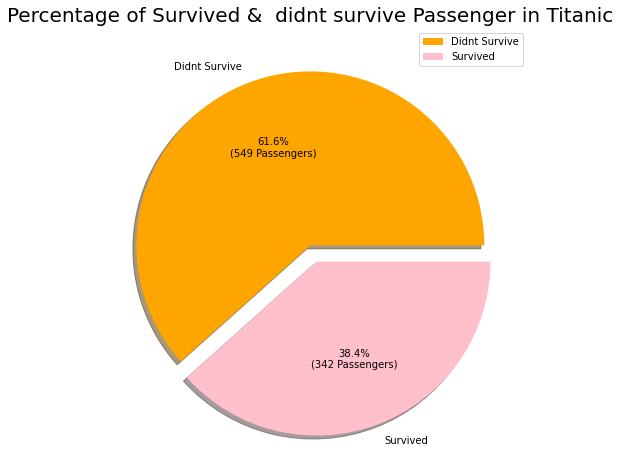

In [19]:
n_df_f=df.select_dtypes(exclude=["object"]).columns
n_df=df[n_df_f]
size = list(n_df['Survived'].value_counts())
labels = ['Didnt Survive', 'Survived']
colors = ['orange', 'pink']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(10,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived &  didnt survive Passenger in Titanic', fontsize = 20)
plt.legend()

only 38.4% of the passengers survived

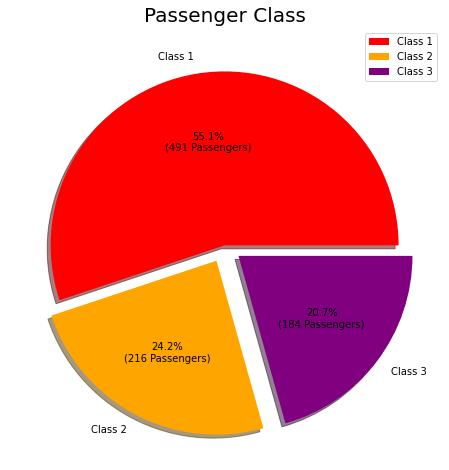

In [20]:
size = list(n_df['Pclass'].value_counts())
labels = ['Class 1', 'Class 2','Class 3']
colors = ['Red', 'Orange','Purple']
explode = [0, 0.1,0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(10,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Passenger Class', fontsize = 20)
plt.legend()



1. Most passengers travelled in class 1. 

2. The least number of passengers travelled in class 3

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

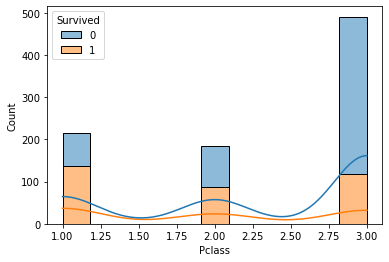

In [21]:
import seaborn as sns 
sns.histplot(df,x="Pclass",stat="count",bins="auto",hue="Survived",multiple="stack",kde=True)


class 1: has higher percentage of passengers that survived. 

class 2: has almost equal percentage of survived and didn't survive. 
    
class3: has higher percentage of passengers that didn't survive 

<AxesSubplot:xlabel='Sex', ylabel='Count'>

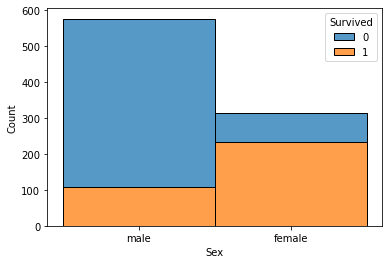

In [22]:
sns.histplot(df,x="Sex",stat="count",bins="auto",hue="Survived",multiple="stack")



Male: most men didn't survive.
    
Female= most women survived. 

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

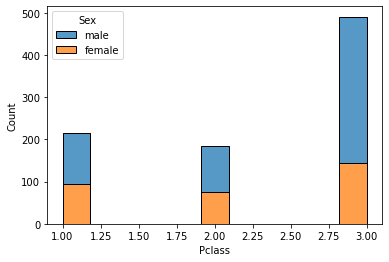

In [23]:
sns.histplot(df,x="Pclass",stat="count",bins="auto",hue="Sex",multiple="stack")


    
Class 1 - has higher number of men to women by a small margin 

Class 2 - has higher number of men

Class 3 - has higher number of men

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

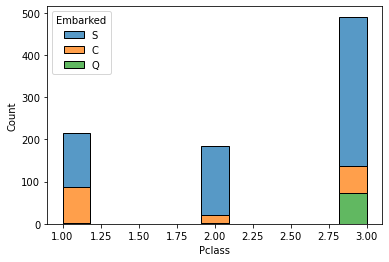

In [24]:
sns.histplot(df,x="Pclass",stat="count",bins="auto",hue="Embarked",multiple="stack")



Embarkation Q  is only present in class 3
    

<AxesSubplot:xlabel='Sex', ylabel='Age'>

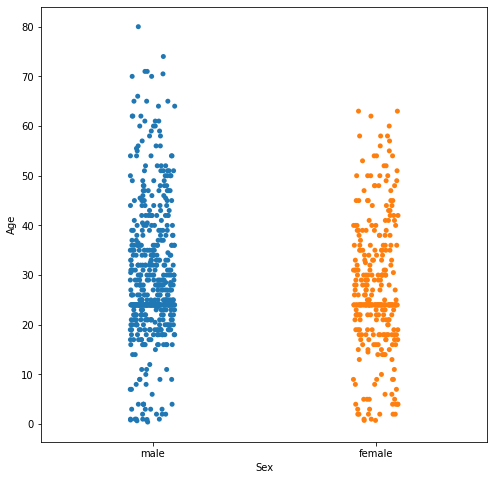

In [25]:
plt.subplots(figsize=(8,8))
sns.stripplot(x="Sex",y="Age",data=df)

Most passengers are between the age 20-30 years

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

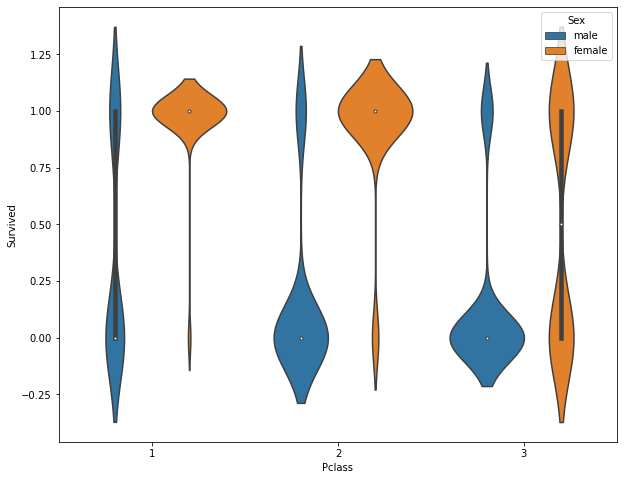

In [26]:
plt.subplots(figsize=(10,8))
sns.violinplot(x="Pclass",y="Survived",hue="Sex",data=df)


    
1. Most men in class 1 didn't survive.


2. Most women in class 1 survived. 


3. Most men in class 2 didn't survive.


4. Most women in class 2 survived. 



5. Most men in class 3 didn't survive. 


6. Almost equal ratio of survival is present in women in class 3

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

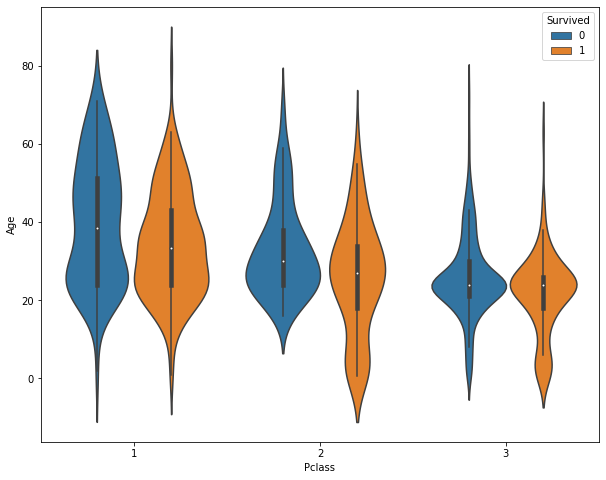

In [27]:
plt.subplots(figsize=(10,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=df)



The highest distribution among all classes across different age groups are between 20-60 years  

    
1. Most people that didn't survive on class 1 are of the age group 20-25 years 


2. Most people that survived on class 1 are of the age group 20-50 years.


3. In class 2 there seems to be a higher number of childern that survived.


4. Class 3 also has a good number of childern that survived than the ones that didnt. 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

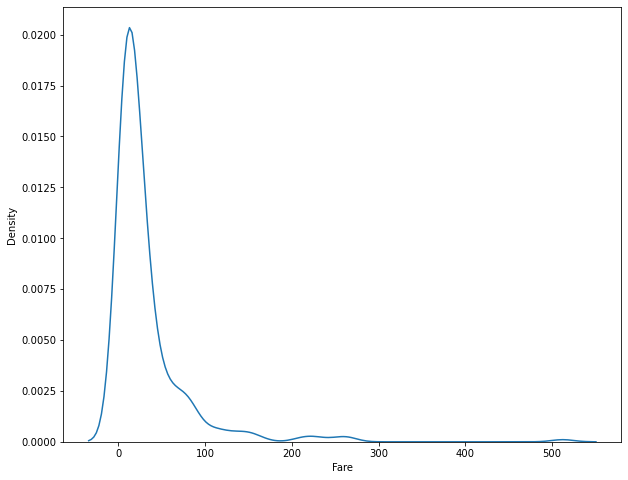

In [28]:
plt.subplots(figsize=(10,8))
sns.kdeplot(data=df,x="Fare")


    
Fare is highly distributed between 0-100

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

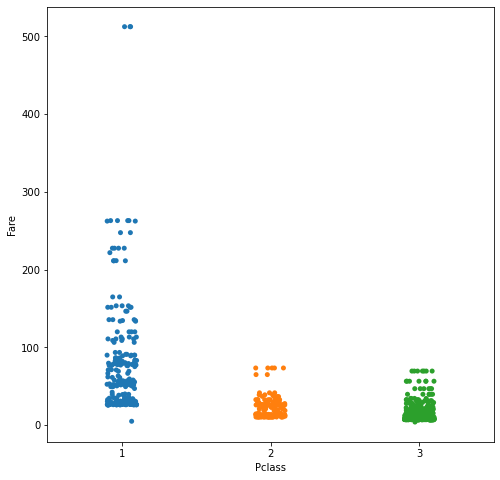

In [29]:
plt.subplots(figsize=(8,8))
sns.stripplot(x="Pclass",y="Fare",data=df)


    
Class 1 has the most expensive fare.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

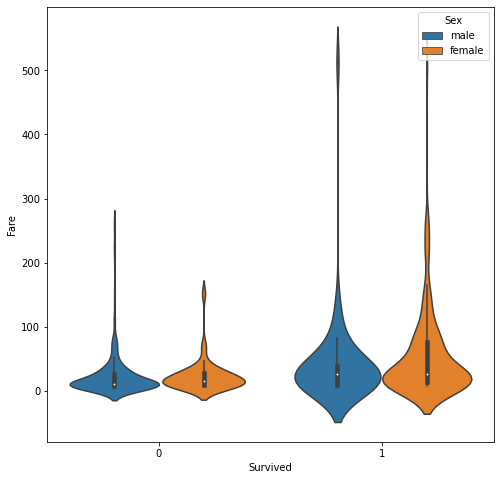

In [30]:
plt.subplots(figsize=(8,8))
sns.violinplot(data=df,x="Survived",y="Fare",hue="Sex")


    
The fare paid by both male and female passengers that survived is higher than the passagers that didn't survive.

<AxesSubplot:xlabel='Parch', ylabel='Count'>

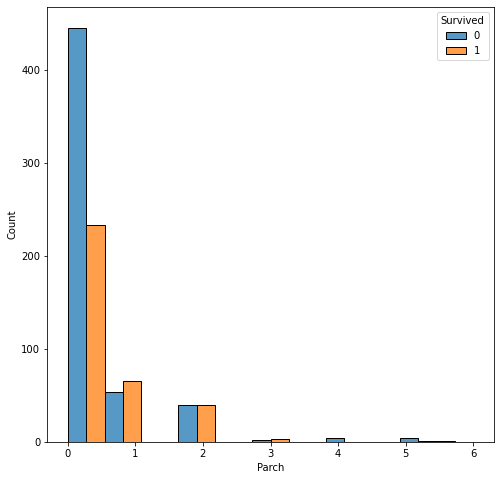

In [31]:
plt.subplots(figsize=(8,8))
sns.histplot(data=df,x="Parch",hue="Survived",multiple="dodge")


    
1. Most passengers with 0 parents or children didn't survive when compared to the ones that did.


2. Most passengers with 1 parent/ child survived. 


3. Equal distribution of passengers with  2 parents/childern that survived and didn't survive. 


4. Most Passengers with 3 parents or childern survived. 


5. Most passengers beyond 3 parents/childern didn't survive.

# Label Encoder

In [32]:
import sklearn 
from sklearn.preprocessing import LabelEncoder 

lencode=LabelEncoder()
df["Sex"]=lencode.fit_transform(df["Sex"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [33]:
df["Ticket"]=lencode.fit_transform(df["Ticket"])
df["Embarked"]=lencode.fit_transform(df["Embarked"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,675,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,C148,0


# Correlation

In [34]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036186,-0.057527,-0.001652,-0.056554,0.015754,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,-0.164549,0.250970,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,0.319869,-0.556493,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,0.059372,-0.174772,0.108262
Age,0.036186,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,-0.073202,0.108478,-0.000020
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.079461,0.154941,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.020003,0.211729,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.073202,0.079461,0.020003,1.000000,-0.020645,-0.001729
Fare,0.015754,0.250970,-0.556493,-0.174772,0.108478,0.154941,0.211729,-0.020645,1.000000,-0.219003
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.000020,0.068230,0.039798,-0.001729,-0.219003,1.000000




The target(Survived) is negatively correlated to all features apart from Parch and Fare.

Fare has highest positive correlation with survived.

Sex has highest negative correlation with survived. 

PassengerId is barely making any contribution. 

No multi-colinearity 

<AxesSubplot:>

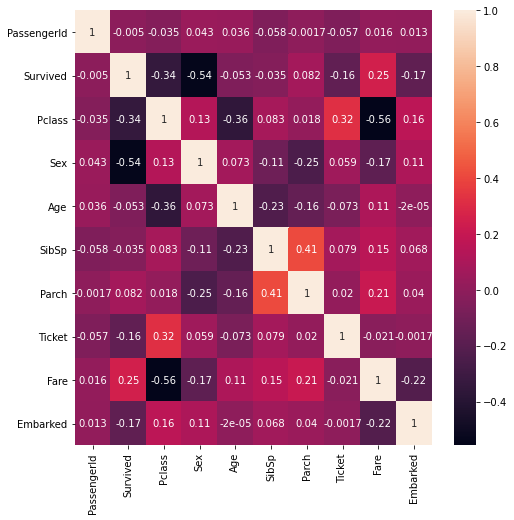

In [35]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

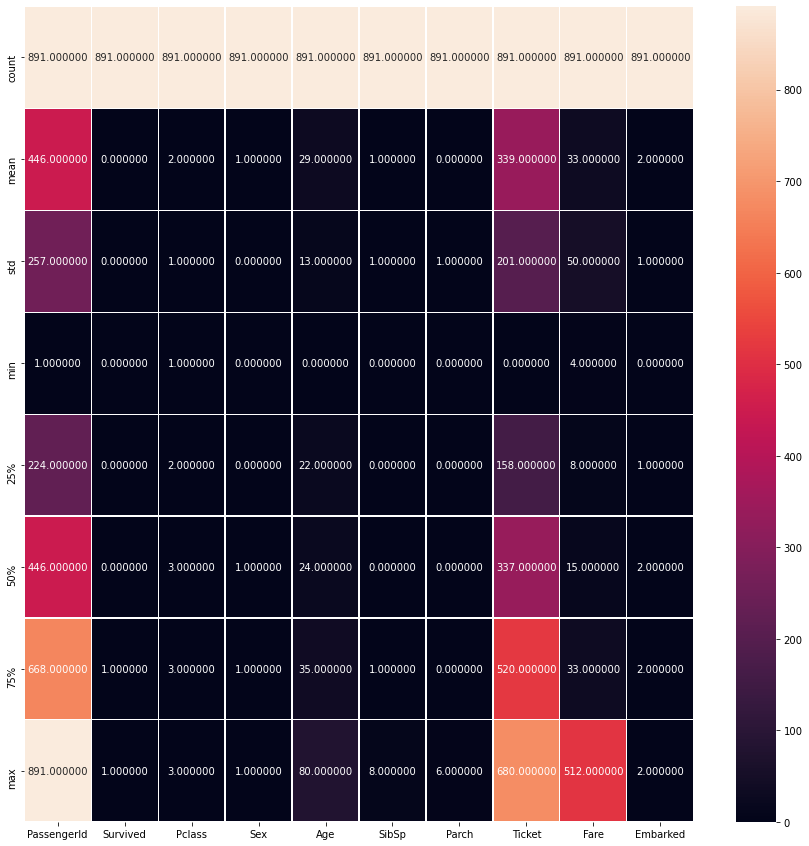

In [36]:
plt.subplots(figsize=(15,15))
sns.heatmap(round(df.describe()),linewidth=0.2,annot=True,fmt="f")

In [37]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,338.528620,32.755650,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,200.850657,49.514222,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,4.012500,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.925000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,337.000000,15.100000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,32.755650,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000



    
1. Fare has mean=32.75, std=49.51 and the difference between 75% and max is too high. This shows evidence of outliers. 


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


Apart from Cabin all other features do not have any missing/null values

# Dropping columns 

In [39]:
df=df.drop(["Name"],axis=1)  #name of passengers have no value to the target 
df=df.drop(["PassengerId"],axis=1) #passengerId has only unique values present. Hence no contribution 

In [40]:
df=df.drop(["Cabin"],axis=1) #cabin has more NaN values than filled ones. We rather drop it than have inconsistent data
df=df.drop(["Ticket"],axis=1)#Ticket has only unique values present. Hence no contribution 

# Checking for outliers and skewness 

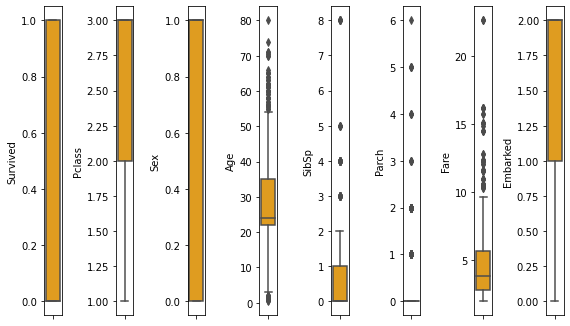

In [147]:
collist=df.columns.values
ncol=15 #no.of columns and rows to display the graphs i.e max col and max row
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="orange",orient="v")
    plt.tight_layout()


    
Fare has outliers

In [42]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        4.810645
Embarked   -1.264823
dtype: float64

In [43]:
df["Fare"]=np.sqrt(df["Fare"])
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        2.215765
Embarked   -1.264823
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

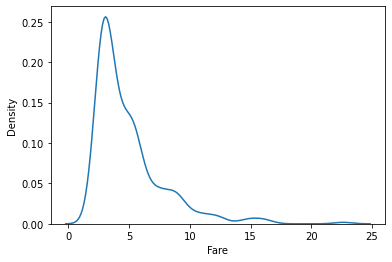

In [44]:
sns.kdeplot(data=df,x="Fare")

<AxesSubplot:xlabel='Age', ylabel='Density'>

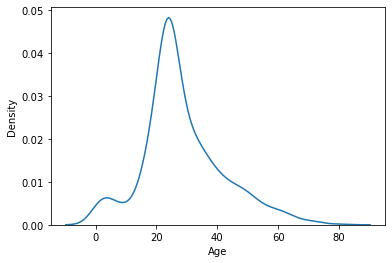

In [45]:
sns.kdeplot(data=df,x="Age")

Both graphs are not normally distributed

# Data Cleaning 

In [46]:
import scipy 
from scipy.stats import zscore 
z=np.abs(zscore(df))  #removes outliers
z.shape

(891, 8)

In [47]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(891, 8)
(820, 8)


In [48]:
#data loss 
loss=(891-820)/891*100
loss

7.968574635241302

Since the data loss is less than 10% we can proceed 

In [49]:
Q1= df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

Survived     1.000000
Pclass       1.000000
Sex          1.000000
Age         13.000000
SibSp        1.000000
Parch        0.000000
Fare         2.908118
Embarked     1.000000
dtype: float64

In [50]:
df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new1.shape

(618, 8)

Data loss here is higher. Therefore, we'll use the zscore method

In [51]:
df_new
y=df_new.iloc[:,0]
x=df_new.iloc[:,1:]

In [52]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.692582,2
1,1,0,38.0,1,0,8.442944,0
2,3,0,26.0,0,0,2.815138,2
3,1,0,35.0,1,0,7.286975,2
4,3,1,35.0,0,0,2.837252,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,3.605551,2
887,1,0,19.0,0,0,5.477226,2
888,3,0,24.0,1,2,4.842520,2
889,1,1,26.0,0,0,5.477226,0


In [53]:
print(x.shape)
print(y.shape)

(820, 7)
(820,)


In [54]:
from sklearn.preprocessing import power_transform 
x.iloc[:,5]=power_transform(x.iloc[:,5].values.reshape(-1,1),method="yeo-johnson") #removing skewness from fare because others are categorical data

In [55]:
x.skew()

Pclass     -0.632242
Sex        -0.664152
Age         0.564753
SibSp       1.979577
Parch       2.122629
Fare        0.254476
Embarked   -1.277386
dtype: float64

Skewness removed from fare

# Preprocessing

In [56]:
import sklearn 
from sklearn.preprocessing import StandardScaler 

In [57]:
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[ 0.8339949 ,  0.72203588, -0.53563936, ..., -0.4511409 ,
        -1.20031083,  0.58316179],
       [-1.58680446, -1.38497273,  0.75793975, ..., -0.4511409 ,
         1.50659183, -1.95366932],
       [ 0.8339949 , -1.38497273, -0.21224459, ..., -0.4511409 ,
        -1.02673343,  0.58316179],
       ...,
       [ 0.8339949 , -1.38497273, -0.37394198, ...,  3.0889121 ,
         0.59348731,  0.58316179],
       [-1.58680446,  0.72203588, -0.21224459, ..., -0.4511409 ,
         0.85003615, -1.95366932],
       [ 0.8339949 ,  0.72203588,  0.27284758, ..., -0.4511409 ,
        -1.06964719, -0.68525377]])

# SMOTE

In [58]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE 
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [60]:
trainy.value_counts()

0    500
1    500
Name: Survived, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=42)

In [63]:
print(x_train.shape)
print(x_test.shape)

(800, 7)
(200, 7)


In [64]:
print(y_train.shape)
print(y_test.shape)

(800,)
(200,)


# LogisticRegression

In [96]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix

In [97]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    
    pred_test_lr=lr.predict(x_test)
    
    print("At random state=",i,'testing accuracy =',accuracy_score(y_test,pred_test_lr))
    print("\n")

At random state= 0 testing accuracy = 0.755


At random state= 1 testing accuracy = 0.67


At random state= 2 testing accuracy = 0.74


At random state= 3 testing accuracy = 0.775


At random state= 4 testing accuracy = 0.805


At random state= 5 testing accuracy = 0.71


At random state= 6 testing accuracy = 0.75


At random state= 7 testing accuracy = 0.79


At random state= 8 testing accuracy = 0.78


At random state= 9 testing accuracy = 0.8


At random state= 10 testing accuracy = 0.79


At random state= 11 testing accuracy = 0.81


At random state= 12 testing accuracy = 0.795


At random state= 13 testing accuracy = 0.795


At random state= 14 testing accuracy = 0.77


At random state= 15 testing accuracy = 0.765


At random state= 16 testing accuracy = 0.755


At random state= 17 testing accuracy = 0.76


At random state= 18 testing accuracy = 0.795


At random state= 19 testing accuracy = 0.7


At random state= 20 testing accuracy = 0.785


At random state= 21 testing accuracy 

# DecisionTreeClassifier

In [98]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score 

In [99]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":["gini", "entropy"],"splitter":["best","random"],"max_features":["auto", "sqrt", "log2"],"random_state":list(range(0,100))}
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'random_state': 41, 'splitter': 'best'}


In [100]:
dt=DecisionTreeClassifier(criterion="entropy",max_features='auto',random_state=41,splitter="best",)
dt.fit(x_train,y_train)

pred_test=dt.predict(x_test)
acc_test=accuracy_score(pred_test,y_test)

print("acc_test =",acc_test)

acc_test = 0.785


DecisionTree is overfit 

# RandomForestClassifier

In [126]:
parameters={"criterion":["gini", "entropy"],"class_weight":["balanced","balanced_subsample"],"max_features":["auto", "sqrt", "log2"]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}


In [127]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight="balanced",criterion="entropy",max_features="sqrt",random_state=42)
rf.fit(x_train,y_train)

pred_test_rf=rf.predict(x_test)
acc_test=accuracy_score(pred_test_rf,y_test)

print("acc_test =",acc_test)

acc_test = 0.78


# SVC

In [137]:
from sklearn.svm import SVC
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"],"decision_function_shape":["ovo","ovr"]}
svc = SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


In [138]:
svc = SVC(decision_function_shape="ovo",gamma="scale",kernel="rbf",probability=True,random_state=32)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.815

In [139]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=38)
lr.fit(x_train,y_train)
    
pred_test=lr.predict(x_test)
    
print("testing accuracy =",accuracy_score(y_test,pred_test))

testing accuracy = 0.815


# Cross Val score

Cross val for svc

In [142]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(svc,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 81.46341463414635 at cv = 2
Score = 81.70770835004411 at cv = 3
Score = 82.1951219512195 at cv = 4
Score = 82.07317073170731 at cv = 5
Score = 81.95219693716903 at cv = 6
Score = 81.70671136772832 at cv = 7
Score = 82.07095945174186 at cv = 8
Score = 81.58146201624461 at cv = 9
Score = 81.82926829268294 at cv = 10


Cross val for LogisticRegression 

In [140]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(lr,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 78.90243902439025 at cv = 2
Score = 78.53845262604388 at cv = 3
Score = 78.90243902439025 at cv = 4
Score = 78.53658536585367 at cv = 5
Score = 78.90457277801632 at cv = 6
Score = 79.02568241551292 at cv = 7
Score = 78.65981343993909 at cv = 8
Score = 78.6576949620428 at cv = 9
Score = 78.41463414634148 at cv = 10


cross val for RandomForestClassifier

In [141]:
for i in range(2,11):
    rf_cv=cross_val_score(rf,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 78.04878048780488 at cv = 2
Score = 79.88155396914522 at cv = 3
Score = 80.73170731707317 at cv = 4
Score = 80.73170731707317 at cv = 5
Score = 80.60773579504796 at cv = 6
Score = 80.9834233563047 at cv = 7
Score = 80.12921187892633 at cv = 8
Score = 80.61660561660563 at cv = 9
Score = 79.51219512195122 at cv = 10


cross val score for DecisionTreeClassifier

In [143]:
for i in range(2,11):
    rf_cv=cross_val_score(dt,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 77.19512195121952 at cv = 2
Score = 76.46453303387611 at cv = 3
Score = 76.21951219512195 at cv = 4
Score = 75.85365853658537 at cv = 5
Score = 75.61006154286532 at cv = 6
Score = 76.58988845429523 at cv = 7
Score = 76.8275271273558 at cv = 8
Score = 75.98210967776184 at cv = 9
Score = 76.34146341463415 at cv = 10


In [144]:
rf_cv=cross_val_score(svc,x,y,cv=5)
rfs=rf_cv.mean()
print("CV_Score =",rfs*100)
print("Accuracy_score =",accuracy_score(y_test,y_pred)*100)


CV_Score = 82.07317073170731
Accuracy_score = 81.5


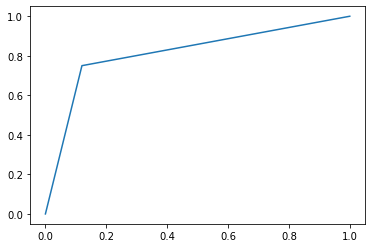

In [145]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)

The best model is  SVC 

# Model Saving 

In [146]:
import pickle 
filename= "titanic.pkl"
pickle.dump(svc, open(filename,"wb"))

# Conclusion 

In [83]:
a=np.array(y_test)
predicted = np.array(svc.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
195,1,1
196,1,1
197,1,0
198,0,0
